# LetsGrowMore Data science Internship program

## Task-1 (INTERMEDIATE LEVEL TASK):  Exploratory Data Analysis on Dataset - Terrorism 

### Author : Kaushik kishor kajale¶


### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loding the dataset

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

There are 181691 rows and 135 columns in dataset

In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

### Choose some important columns for Exploratory data analysis

In [6]:
data = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','success', 'suicide',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [7]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,success,suicide,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,1,0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,1,0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,1,0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,1,0,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,1,0,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.shape

(181691, 20)

Here, dataset have 181691 rows and 20 columns.

### Checking the null values in data

In [9]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
success            0
suicide            0
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

## Exploratory data analysis

### Descreptive Statistics

In [10]:
data.describe()

,Year,Month,day,latitude,longitude,kill,success,suicide,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,181691.000000,181691.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,0.889598,0.036507,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,0.313391,0.187549,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,1.000000,1.000000,8191.000000


### Number of Global Attacks per year (1970-2017)

Text(0, 0.5, 'Incidents')

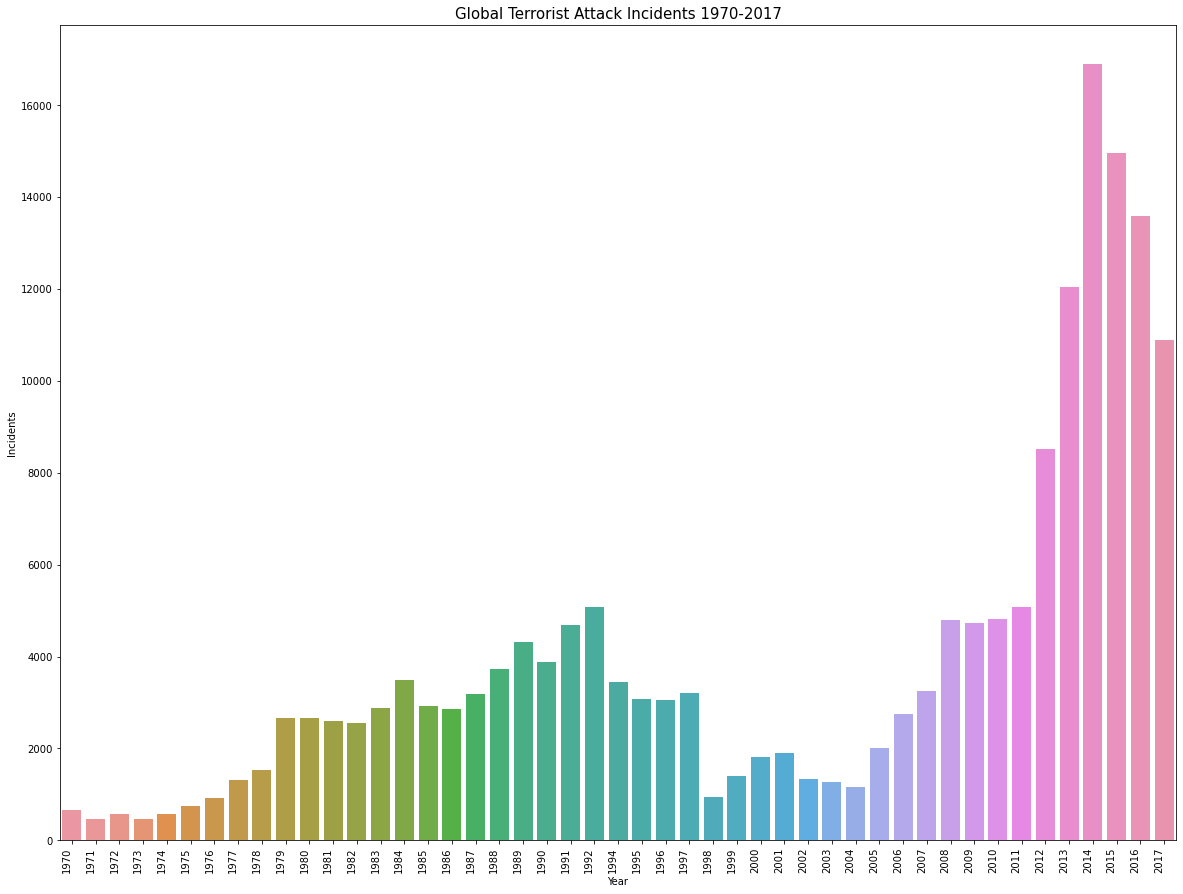

In [11]:
plt.figure(figsize=(20,15))
ct=sns.countplot(x='Year',data=data)
ct.set_xticklabels(ct.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

We can see here incresing and decresing nature of number of attacks incidents till 2005, and after that from 2010-2014 sudden
sharp rise in the number of attacks/incidents.Since 2014 and 2015 has a large number of Terrorist activities.

### Terrorist Attack-type

Text(0, 0.5, 'Count ')

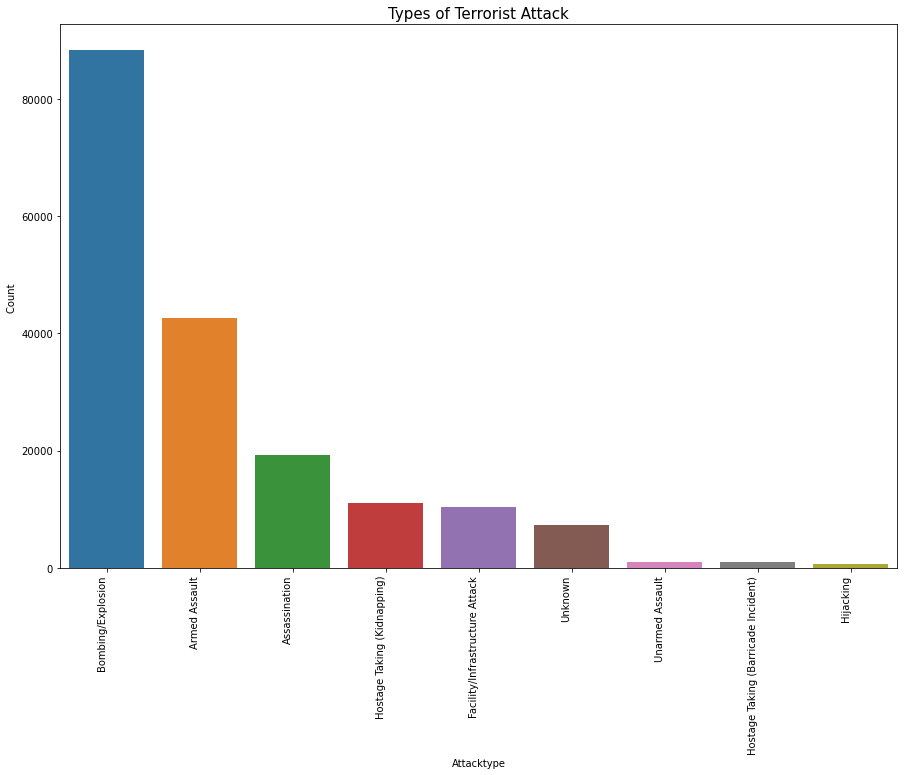

In [12]:
plt.figure(figsize=(15,10))
ct = sns.countplot(x='Attacktype',data=df,order = data['Attacktype'].value_counts().index)
ct.set_xticklabels(ct.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist Attack',size=15)
plt.ylabel('Count ')

Here we clearly see in most of terrorist attack attackers use bombs and explosive things then armed assault weapons.Other than hiijaking they use rarely.

### Global Bombing

Text(-2.6999999999999815, 0.5, 'occurrence')

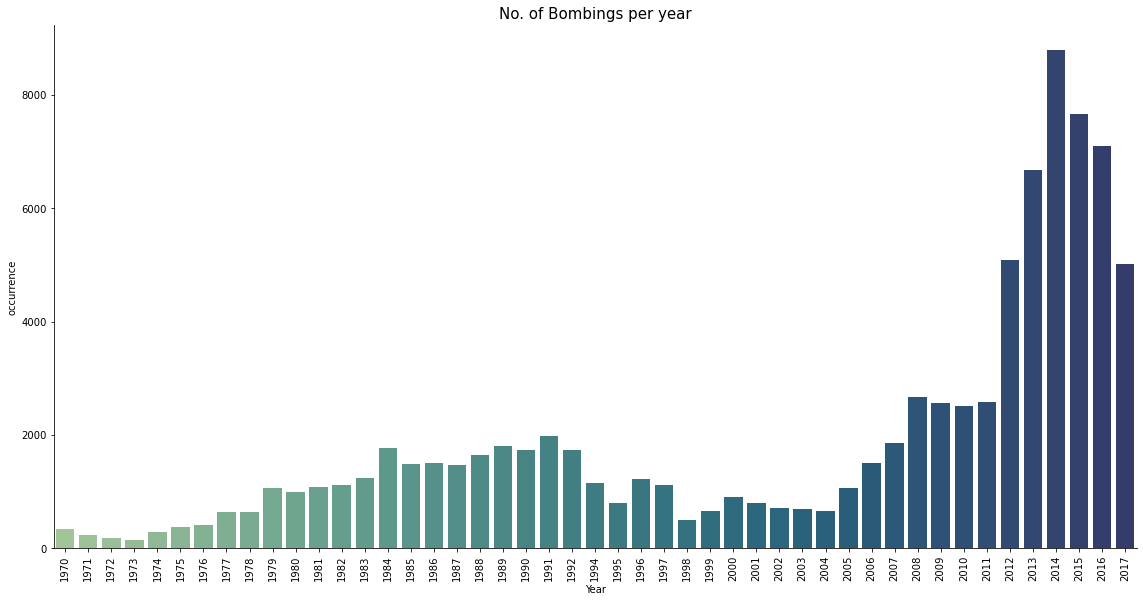

In [13]:
data_bombing = data[data['Attacktype'] == 'Bombing/Explosion']
sns.catplot(x='Year',data=data_bombing,kind='count',height=8, aspect=2,palette='crest')
plt.xticks(rotation=90)
plt.title('No. of Bombings per year',size=15)
plt.ylabel('occurrence')

From 2012 bombing attack mostly follow AS Global attack,highest in 2014.

Text(0.5, 1.0, 'Type of Target')

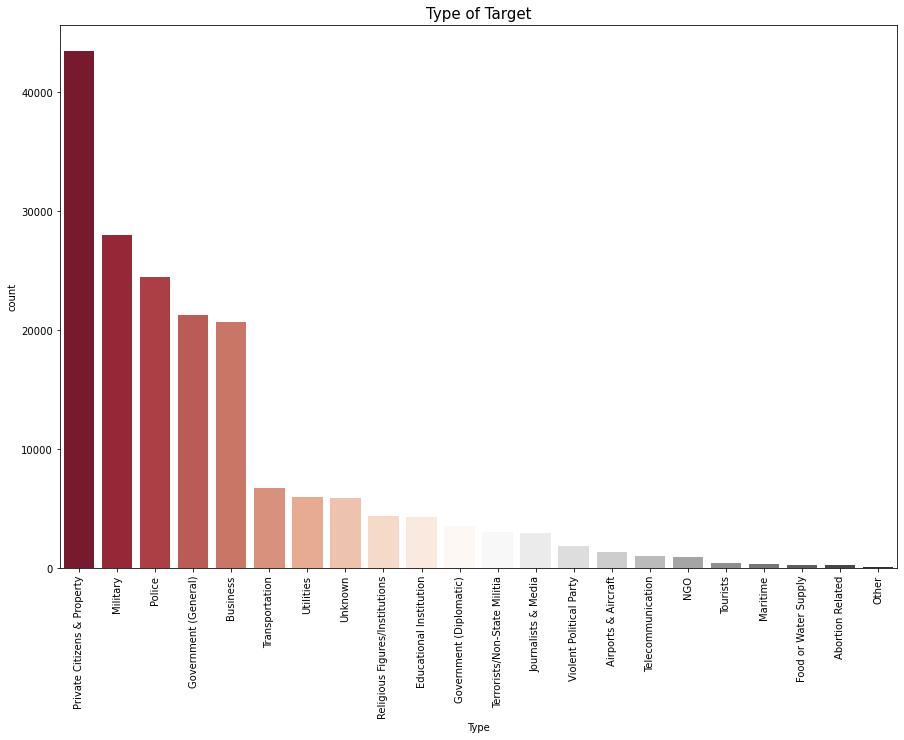

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(df['Targettype'],order=df['Targettype'].value_counts().index,palette='RdGy')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target',size=15)

We can see overwhelmingly that the most frequent target is civilians who as a result also suffer the most at the hands of terrorists.

### Contries wise Attack Top 10

Text(0.5, 1.0, 'Top-10 Countries Total Attacks by Country')

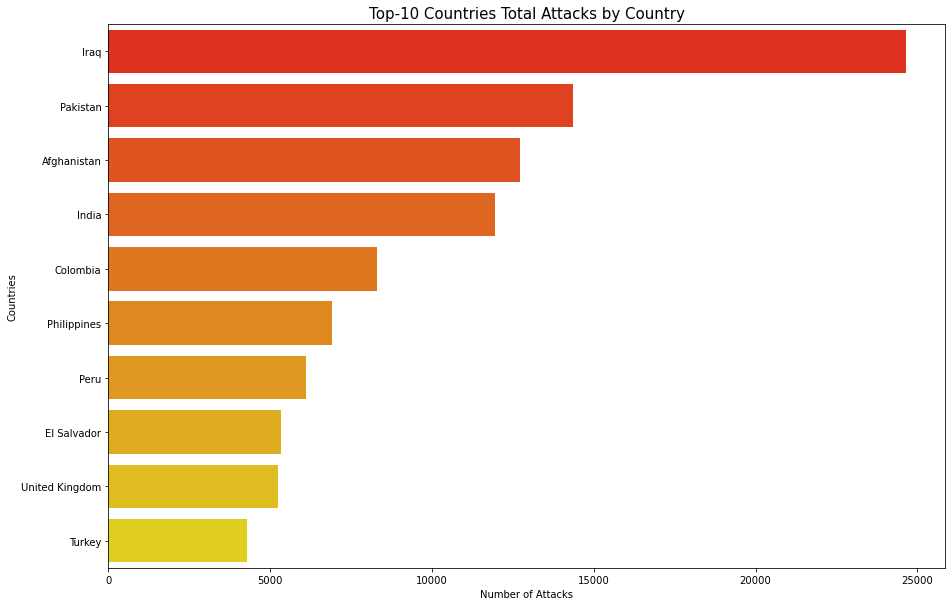

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['Country'].value_counts().values[:10], y = df['Country'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10 Countries Total Attacks by Country',size=15)

Iraq is the country where maximum terrorist attaked happened.

### Region Wise Attack

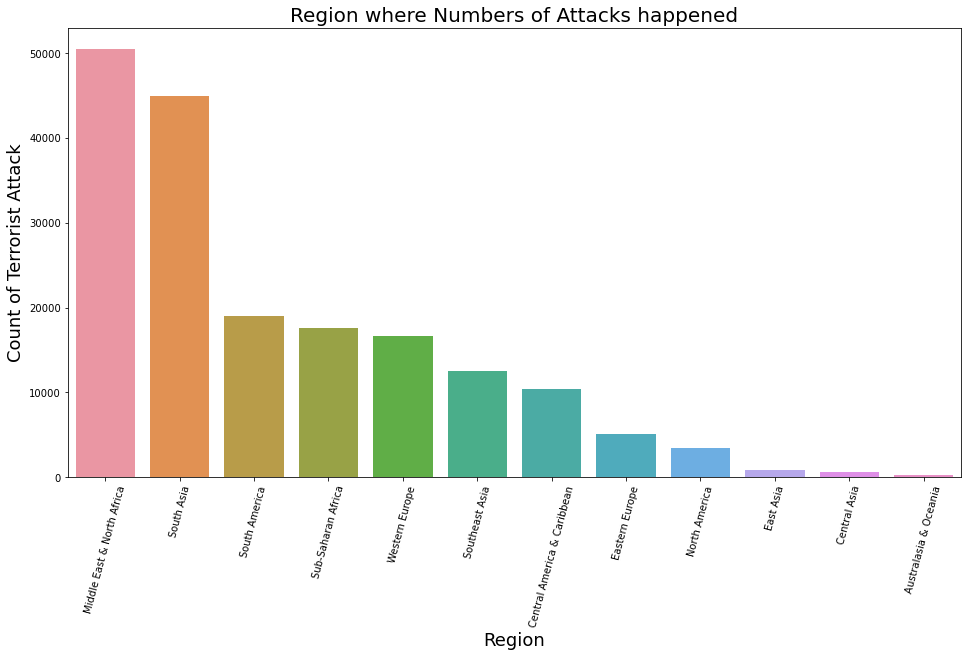

In [16]:
ct=plt.rcParams['figure.figsize'] = 16,8.27
ct=sns.countplot(x='Region',data=data,order = data['Region'].value_counts().index)
ct.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ct.set_ylabel('Count of Terrorist Attack',fontsize=18)
ct.set_title('Region where Numbers of Attacks happened',fontsize=20);

The Middle East and South Asia Regions has most taregeted by Terrorist

### Most Frequent Used Weapon in Attacks

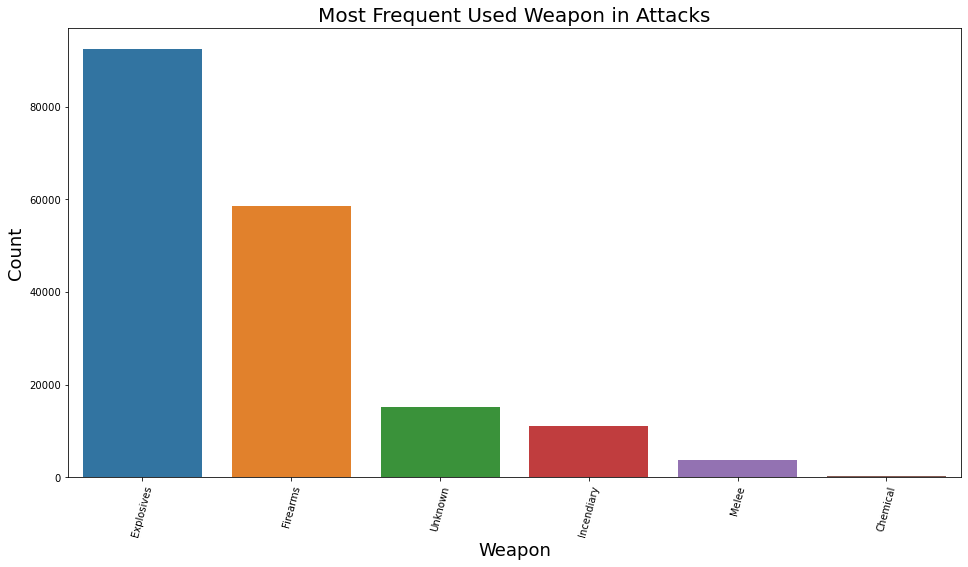

In [17]:
ct=plt.rcParams['figure.figsize'] = 16,8.27
ct=sns.countplot(x='Weapon',data=data,order = data['Weapon'].value_counts().index[:6])
ct.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ct.set_ylabel('Count',fontsize=18)
ct.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

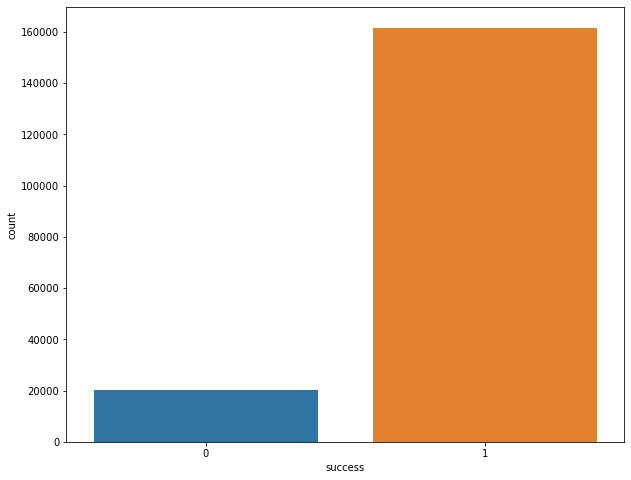

In [18]:
fig,axes=plt.subplots(figsize=(10,8))
sns.countplot(data.success,ax=axes)
plt.show()

### Terrorist Organisation with Highest Terror Attacks

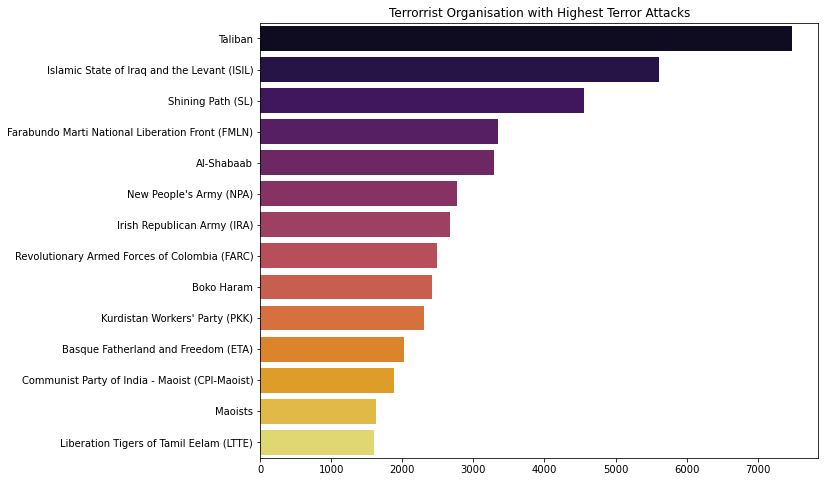

In [19]:
sns.barplot(data['Group'].value_counts()[1:15].values,data['Group'].value_counts()[1:15].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorrist Organisation with Highest Terror Attacks')
plt.show()

Terrorist organisation name Taliban holds highest attacks.

### Terrorist groups Activity

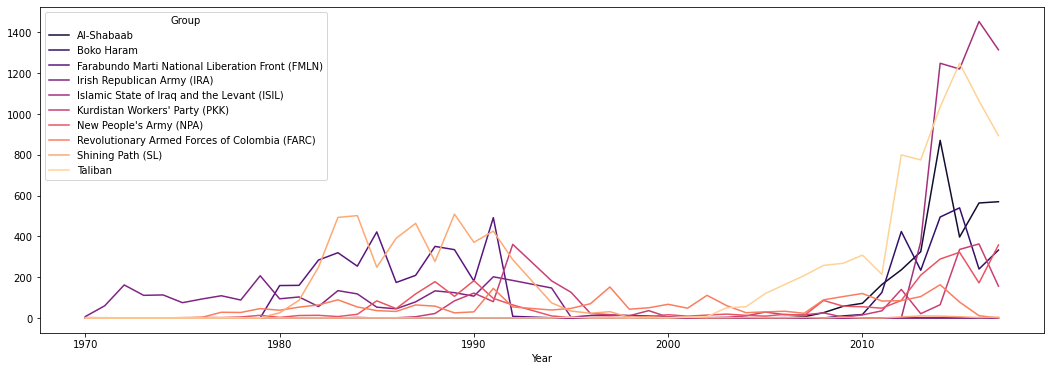

In [20]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Conclusions:
- We can see here incresing and decresing nature of number of attacks incidents till 2005, and after that from 2010-2014 sudden   sharp rise in the number of attacks/incidents.Since 2014 and 2015 has a large number of Terrorist activities.
- most of terrorist attack attackers use bombs and explosive things then armed assault weapons.Other than hiijaking they use    rarely.
- From 2012 bombing attack mostly follow AS Global attack,highest in 2014.
- The most frequent target is civilians who as a result also suffer the most at the hands of terrorists.
- Iraq is the country where maximum terrorist attaked happened.
- The Middle East and South Asia Regions has most taregeted by Terrorist
- Explosive Weapons are mostly used in attack


## Thank you